In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:

raw_asylum_df = te.getWBIndicator(series_code = 'SM.POP.REFG', output_type='df')
raw_origin_df = te.getWBIndicator(series_code = 'SM.POP.REFG.OR', output_type='df')


In [4]:
asylum_df = raw_asylum_df.loc[raw_asylum_df['description'] == 'Refugee population by country or territory of asylum']
asylum_df = asylum_df[['last','country']].rename(columns={'last':'Number of Asylum Requests','country': 'Country'}).set_index('Country')
asylum_df = asylum_df.sort_values(by='Number of Asylum Requests', ascending=False)

origin_df = raw_origin_df[['last','country']].rename(columns={'last':'Number of Refugees (Country Origin)','country': 'Country'}).set_index('Country')
origin_df = origin_df.sort_values(by='Number of Refugees (Country Origin)', ascending=False)


df = pd.merge(origin_df, asylum_df, on='Country')

df = df[df.index != 'World']  
df = df[df.index != 'Euro area']
df = df[df.index != 'European Union']


df = df.sort_values(by='Number of Refugees (Country Origin)', ascending=False)
df = df.head(15)

df

,Number of Refugees (Country Origin),Number of Asylum Requests
Country,,
South Asia,3026497.0,2562316.0
Afghanistan,2728853.0,72227.0
South Sudan,2234814.0,298309.0
Myanmar,1078268.0,0.0
Somalia,905109.0,17882.0
Sudan,734947.0,1055489.0
Central African Republic,610203.0,7170.0
Eritrea,505118.0,199.0
Burundi,381508.0,78465.0


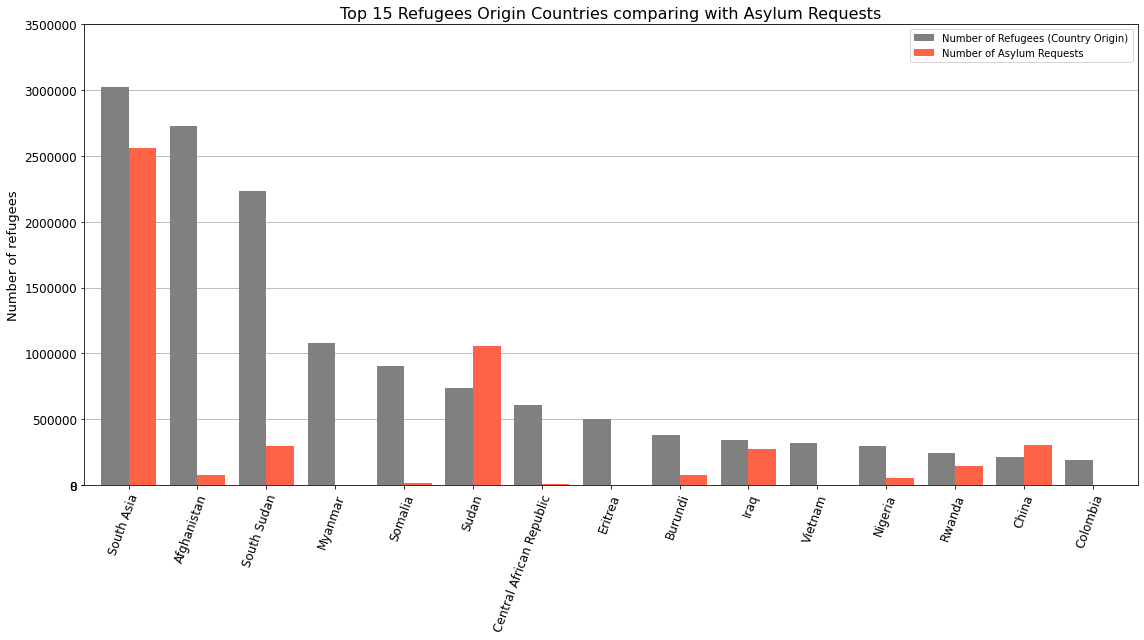

In [5]:

color_dict = {'Number of Refugees (Country Origin)': 'gray', 'Number of Asylum Requests': 'tomato'}

df.plot(
    figsize=(16, 9),
    kind='bar',
    width=0.8,
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=70,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [7.5])
ax.yaxis.grid(zorder=0)
ax.set_title('Top 15 Refugees Origin Countries comparing with Asylum Requests', color='black', size=16)
plt.xlabel('', fontsize=13)
plt.ylabel('Number of refugees', fontsize=13)
plt.tight_layout()